Matplotlib 用户指南 https://wizardforcel.gitbooks.io/matplotlib-user-guide/content/  
Anatomy Of Matplotlib Part1 http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb

## 2. Subplots(多图)

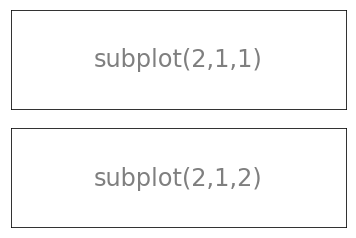

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,1,1)',ha='center',va='center',size=24,alpha=.5)

plt.subplot(2,1,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,1,2)',ha='center',va='center',size=24,alpha=.5)

# plt.savefig('../figures/subplot-horizontal.png', dpi=64)
plt.show()


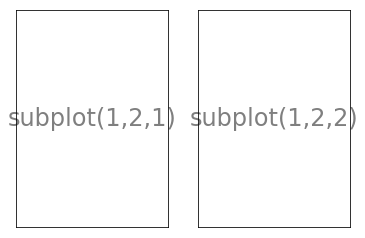

In [2]:
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(1,2,1)',ha='center',va='center',size=24,alpha=.5)

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(1,2,2)',ha='center',va='center',size=24,alpha=.5)

# plt.savefig('../figures/subplot-vertical.png', dpi=64)
plt.show()

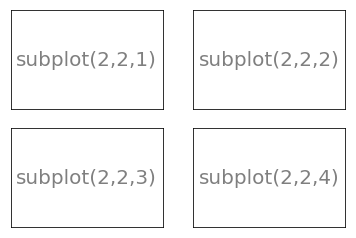

In [3]:
plt.subplot(2,2,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,1)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,3)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,4)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=20,alpha=.5)

# savefig('../figures/subplot-grid.png', dpi=64)
plt.show()

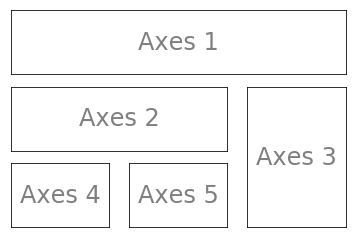

In [6]:
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)

axes_2 = plt.subplot(G[1,:-1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 3',ha='center',va='center',size=24,alpha=.5)

axes_4 = plt.subplot(G[-1,0])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 4',ha='center',va='center',size=24,alpha=.5)

axes_5 = plt.subplot(G[-1,-2])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 5',ha='center',va='center',size=24,alpha=.5)

#plt.savefig('../figures/gridspec.png', dpi=64)
plt.show()

## 1. 动画效果（梯度下降）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

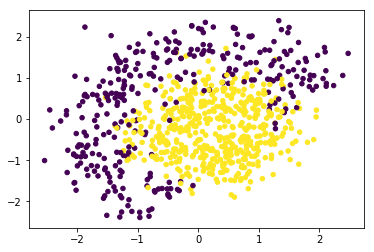

In [5]:
with open('data/train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('data/target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

In [6]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature1*feature2, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    
    X1 = X[:, 0]
    X2 = X[:, 1]
    X_expanded[:, 0] = X1
    X_expanded[:, 1] = X2
    X_expanded[:, 2] = X1**2
    X_expanded[:, 3] = X2**2
    X_expanded[:, 4] = X1*X2
    X_expanded[:, 5] = 1
    
    return X_expanded
    # TODO:<your code here>
    
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    return 1/(1+np.exp(-np.dot(X, w)))

def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function using formula above.
    """
    # TODO:<your code here>
    l = X.shape[0]
    a = probability(X, w)
    loss = -1/l*(np.dot(y, np.log(a)) + np.dot(1-y, np.log(1-a)))
    return loss

def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    l = X.shape[0]
    a = probability(X, w)
    
    grad = 1/l*np.dot(X.T, (a - y))
    return grad
    # TODO<your code here>
    
    

In [12]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)

    plt.subplot(1, 3, 2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 3, 3)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

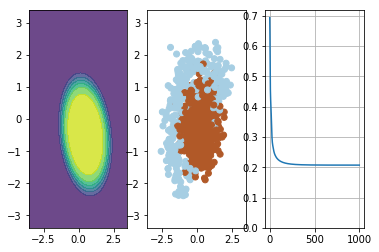

In [20]:
# please use np.random.seed(42), eta=0.05, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
X_expanded = expand(X)
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

n_iter = 1000
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(36, 36))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    nu = alpha*nu + eta * compute_grad(X_expanded, y, w)
    w = 1.0*w - nu         
    # TODO:<your code here>

visualize(X, y, w, loss)
plt.clf()

## pyplot
pyplot provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab(TM). Therefore, the majority of plotting commands in pyplot have Matlab(TM) analogs with similar arguments. Important commands are explained with interactive examples.

# Simple plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


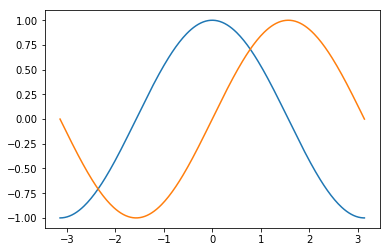

In [2]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0,4.0)

# Set x ticks 坐标刻度
plt.xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
plt.ylim(-1.0,1.0)

# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()


<Figure size 640x480 with 1 Axes>

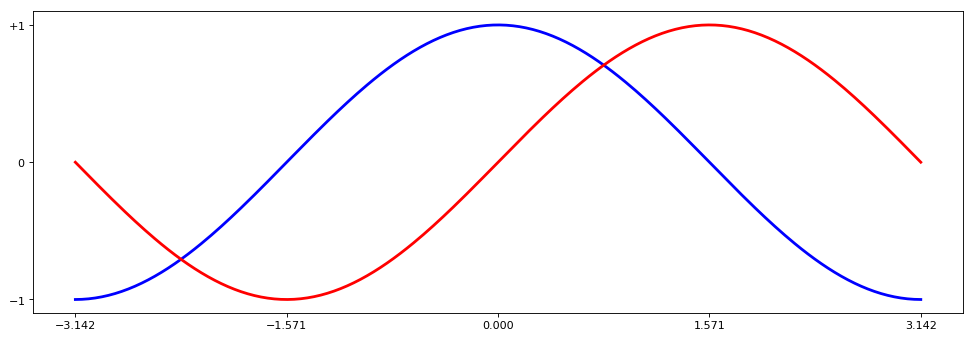

In [11]:
plt.figure(figsize=(15,5), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

#Setting ticks
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.show()

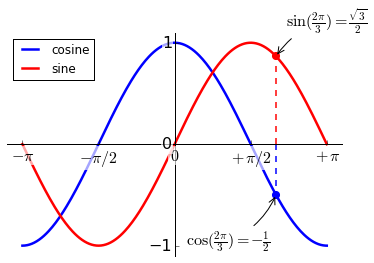

In [5]:
#Moving spines
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

#Setting tick labels
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1])

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

# Annotate some points
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(['cosine', 'sine'], loc='upper left',  frameon=True)

# The tick labels are now hardly visible because of the blue and red lines. We can make 
# them bigger and we can also adjust their properties such that they'll be rendered
# on a semi-transparent white background. 
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.show()


# Figures, Subplots, Axes and Ticks
When we call plot, matplotlib calls gca() to get the current axes and gca in turn calls gcf() to get the current figure.

## Figures
A figure is the windows in the GUI that has "Figure #" as title. Figures are numbered starting from 1 as opposed to the normal Python way starting from 0. This is clearly MATLAB-style. There are several parameters that determine what the figure looks like:

## Subplots

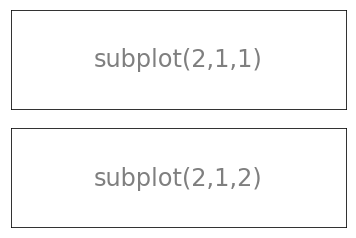

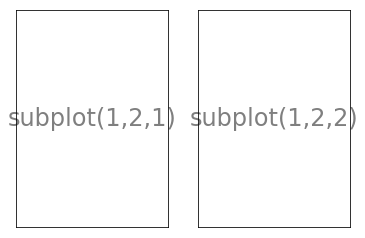

In [4]:
from pylab import *

subplot(1,2,1)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(1,2,1)',ha='center',va='center',size=24,alpha=.5)

subplot(1,2,2)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(1,2,2)',ha='center',va='center',size=24,alpha=.5)

# plt.savefig('../figures/subplot-vertical.png', dpi=64)
show()

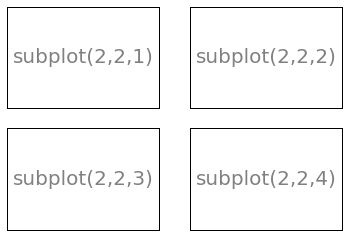

In [39]:
from pylab import *

subplot(2,2,1)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,1)',ha='center',va='center',size=20,alpha=.5)

subplot(2,2,2)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=20,alpha=.5)

subplot(2,2,3)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=20,alpha=.5)

subplot(2,2,4)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=20,alpha=.5)

# savefig('../figures/subplot-grid.png', dpi=64)
show()

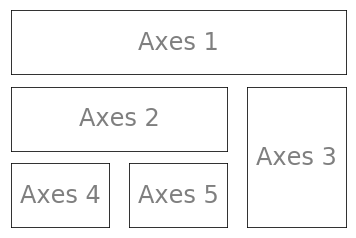

In [7]:
from pylab import *
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(3, 3)

axes_1 = subplot(G[0, :])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)

axes_2 = subplot(G[1,:-1])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)

axes_3 = subplot(G[1:, -1])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 3',ha='center',va='center',size=24,alpha=.5)

axes_4 = subplot(G[-1,0])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 4',ha='center',va='center',size=24,alpha=.5)

axes_5 = subplot(G[-1,-2])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 5',ha='center',va='center',size=24,alpha=.5)

#plt.savefig('../figures/gridspec.png', dpi=64)
show()

## Axes
Axes are very similar to subplots but allow placement of plots at any location in the figure. So if we want to put a smaller plot inside a bigger one we do so with axes.

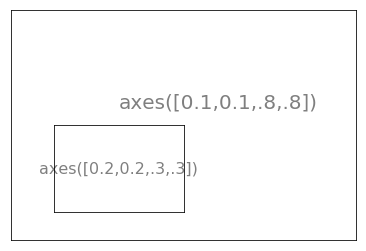

In [8]:
from pylab import *

axes([0.1,0.1,.8,.8])
xticks([]), yticks([])
text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

axes([0.2,0.2,.3,.3])
xticks([]), yticks([])
text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

#plt.savefig("../figures/axes.png",dpi=64)
show()

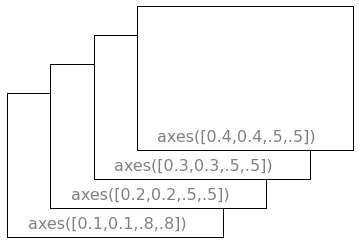

In [32]:
from pylab import *

axes([0.1,0.1,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.1,0.1,.8,.8])',ha='left',va='center',size=16,alpha=.5)

axes([0.2,0.2,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.2,0.2,.5,.5])',ha='left',va='center',size=16,alpha=.5)

axes([0.3,0.3,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.3,0.3,.5,.5])',ha='left',va='center',size=16,alpha=.5)

axes([0.4,0.4,.5,.5])
xticks([]), yticks([])
text(0.1,0.1, 'axes([0.4,0.4,.5,.5])',ha='left',va='center',size=16,alpha=.5)

# plt.savefig("../figures/axes-2.png",dpi=64)
show()

## Ticks
Well formatted ticks are an important part of publishing-ready figures. Matplotlib provides a totally configurable system for ticks.

### Tick Locators
There are several locators for different kind of requirements before  http://www.labri.fr/perso/nrougier/teaching/matplotlib/#animation

# Animation
http://www.labri.fr/perso/nrougier/teaching/matplotlib/#figures-subplots-axes-and-ticks
## DripDrop

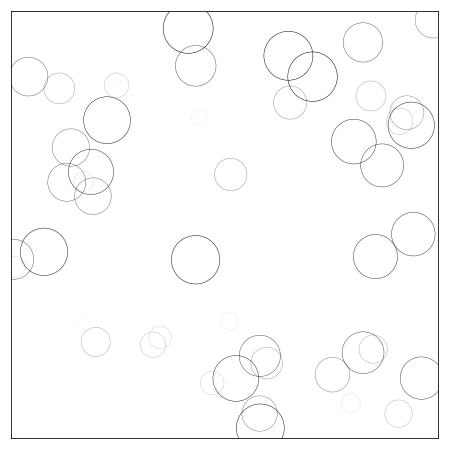

In [9]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt



# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
ax = fig.add_axes([0.005,0.005,.99,.99], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# plt.savefig("../figures/rain-static.png",dpi=72)
plt.show()


In [10]:
plt = 'pilot'
%pylab
%pylab inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'info', 'linalg', 'power', 'plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
#rc('animation', html='html5')
%pylab

# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation1 = animation.FuncAnimation(fig, update, interval=100)
# animation.save('../figures/rain.gif', writer='imagemagick', fps=30, dpi=72)
plt.show()


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [11]:
# -----------------------------------------------------------------------------
# Copyright (c) 2014, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License.
# -----------------------------------------------------------------------------
# Based on : https://peak5390.wordpress.com
# -> 2012/12/08/matplotlib-basemap-tutorial-plotting-global-earthquake-activity/
# -----------------------------------------------------------------------------
import urllib
import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation


# Open the earthquake data
# -------------------------
# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the past 30 days
# url = urllib.urlopen(feed + "significant_month.csv")

# Earthquakes of magnitude > 4.5 in the past 30 days
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Earthquakes of magnitude > 2.5 in the past 30 days
# url = urllib.urlopen(feed + "2.5_month.csv")

# Earthquakes of magnitude > 1.0 in the past 30 days
# url = urllib.urlopen(feed + "1.0_month.csv")

# Set earthquake data
data = url.read()
data = data.split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])
for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])


fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)
P = np.zeros(50, dtype=[('position', float, 2),
                        ('size',     float, 1),
                        ('growth',   float, 1),
                        ('color',    float, 4)])

# Basemap projection
map = Basemap(projection='mill')
map.drawcoastlines(color='0.50', linewidth=0.25)
map.fillcontinents(color='0.95')
scat = ax.scatter(P['position'][:,0], P['position'][:,1], P['size'], lw=0.5,
                  edgecolors = P['color'], facecolors='None', zorder=10)


def update(frame):
    current = frame % len(E)
    i = frame % len(P)

    P['color'][:,3] = np.maximum(0, P['color'][:,3] - 1.0/len(P))
    P['size'] += P['growth']

    magnitude = E['magnitude'][current]
    P['position'][i] = map(*E['position'][current])
    P['size'][i] = 5
    P['growth'][i]= np.exp(magnitude) * 0.1

    if magnitude < 6:
        P['color'][i]    = 0,0,1,1
    else:
        P['color'][i]    = 1,0,0,1
    scat.set_edgecolors(P['color'])
    scat.set_facecolors(P['color']*(1,1,1,0.25))
    scat.set_sizes(P['size'])
    scat.set_offsets(P['position'])

plt.title("Earthquakes > 4.5 in the last 30 days")
animation = FuncAnimation(fig, update, interval=10)
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [57]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

%pylab 
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])

    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    #line.scatter(X,Y, s=75, c=T, alpha=.5)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=200, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

%pylab 
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
n = 2
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)
print(X, Y)
#line.scatter
scat = ax.scatter(X,Y, s=75, c=T, alpha=.5)  


# initialization function: plot the background of each frame
def init():  
    return scat,

# animation function.  This is called sequentially
def animate(i):
    n = 3
    X = np.random.normal(0,1,n)
    Y = np.random.normal(0,1,n)
    T = np.arctan2(Y,X)
    #line.scatter
    scat = ax.scatter(X,Y, s=75, c=T, alpha=.5)
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=1000, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


RuntimeError: Invalid DISPLAY variable

# Other Types of Plots

## Scatter Plots

[-3.09781041  2.98969974  1.00801204 ..., -0.71607405  1.01636192
  1.99320079]


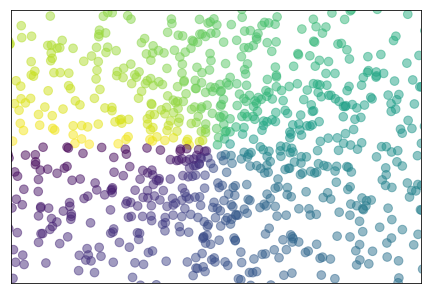

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

print(T)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()

# Beyond this tutorial

* Pyplot tutorial http://matplotlib.sourceforge.net/users/pyplot_tutorial.html
* Image tutorial http://matplotlib.sourceforge.net/users/image_tutorial.html
* Text tutorial http://matplotlib.sourceforge.net/users/index_text.html
* Artist tutorial http://matplotlib.sourceforge.net/users/artists.html
* Path tutorial http://matplotlib.sourceforge.net/users/path_tutorial.html
* Transforms tutorial http://matplotlib.sourceforge.net/users/transforms_tutorial.html
* Matplotlib User guide http://matplotlib.sourceforge.net/users/index.html

# Quick references
there are a lot of options. It's a real good reference.
http://www.labri.fr/perso/nrougier/teaching/matplotlib/#quick-references

# Others

## Sample 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
df = pd.read_csv("VerticaMonitor.csv")
data1 = df[df['Environment']=='CacheReadOnly']['Duration_Time']
data2 = df[df['Environment']=='DEV-AVG']['Duration_Time']
data3 = df[df['Environment']=='ITG-AVG']['Duration_Time']
data4 = df[df['Environment']=='PROD-AVG']['Duration_Time']

data = [data1, data2, data3, data4]
plt.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4], ['CacheReadOnly', 'DEV', 'ITG', 'PROD'])
plt.yticks(np.linspace(0, 8000, 17, endpoint=True))
plt.ylabel("Duration Time(millisecond)")
plt.grid(True)

plt.show()

df1 = pd.DataFrame({'CacheReadOnly': data1.describe(), 'DEV': data2.describe(), 'ITG': data3.describe(), 'PROD': data4.describe()})
df1


FileNotFoundError: File b'VerticaMonitor.csv' does not exist

## Sample2

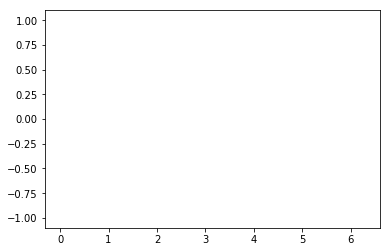

In [21]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

(40,)
(40,)
(40, 40)
(40, 40)


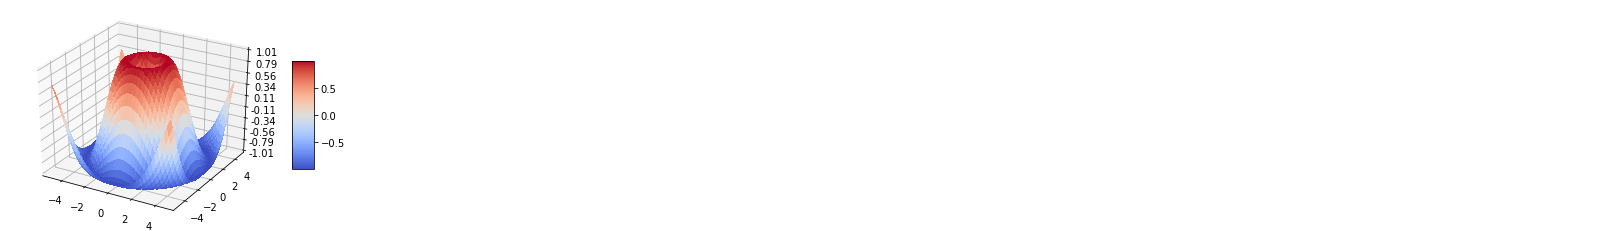

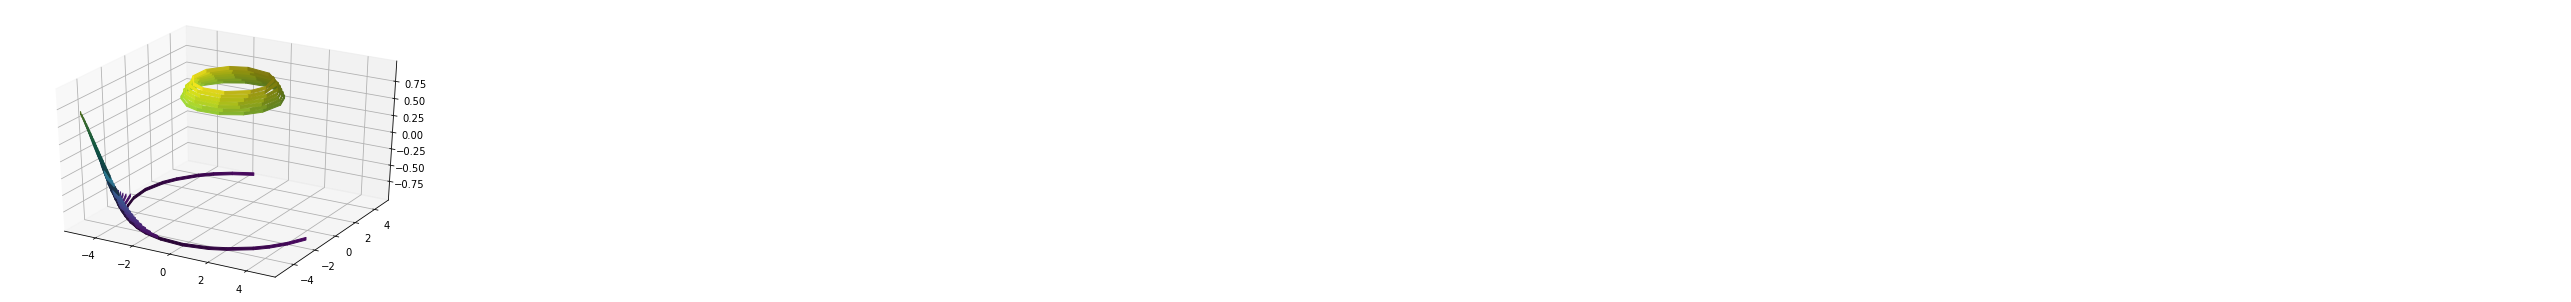

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
print(X.shape)
print(Y.shape)
X, Y = np.meshgrid(X, Y)
print(X.shape)
print(Y.shape)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

fig = plt.figure()
ax = Axes3D(fig) 
cset = ax.contour(X, Y, Z, 64, extend3d=True)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()

In [20]:
b = np.arange(-10, 10, 1)
w = np.arange(-1, 4, 0.5)
print(b.shape, w.shape)
b, w = np.meshgrid(b, w)
print(b.shape, w.shape)

(20,) (10,)
(10, 20) (10, 20)


## 画线

plot画图时可以设定线条参数。包括：颜色、线型、标记风格。

- 控制颜色  
    b---blue   
    c---cyan  
    g---green    
    k----black  
    m---magenta 
    r---red  
    w---white    
    y----yellow  
  
    有三种表示颜色的方式:  
    a:用全名    
    b:16进制如：#FF00FF    
    c：RGB或RGBA元组（1,0,1,1）   
    d：灰度强度如：‘0.7’    
    

- 控制线型  
 "-"      实线  
 "--"     短线  
 "-."     短点相间线  
 "："     虚点线  
 
 
- 控制标记风格
 
    "." Point marker  
    "," Pixel marker  
    "o" Circle marker  
    "v" Triangle down marker   
    "^" Triangle up marker   
    "<" Triangle left marker   
    ">" Triangle right marker   
    "1" Tripod down marker  
    "2" Tripod up marker  
    "3" Tripod left marker  
    "4" Tripod right marker  
    "s" Square marker  
    "p" Pentagon marker  
    "*" Star marker  
    "h" Hexagon marker
    "H" Rotated hexagon D Diamond marker
    "d" Thin diamond marker
    "|"Vertical line (vlinesymbol) marker
    "_" Horizontal line (hline symbol) marker
    "+" Plus marker
    "x" Cross (x) marker

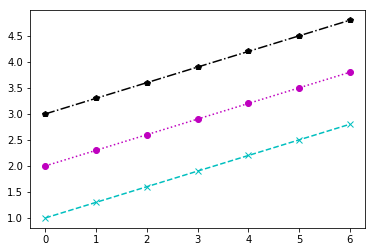

In [31]:
import matplotlib.pyplot as plt   
import numpy as np   
y = np.arange(1, 3, 0.3)   
plt.plot(y, 'cx--', y+1, 'mo:', y+2, 'kp-.');  
plt.show()  